In [104]:
from sympy import solve, symbols, eye, Eq
from sympy import Matrix, latex
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy import rad as Rad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Latex, display, Math

# Практическое занятие 13
# Компьютерный практикум по алгебре на Python
## Линейные операторы на плоскости и в пространстве
### Задание 1.
Написать функцию, составляющую матрицу линейного оператора поворота на $\alpha$ градусов или радиан **по** или **против часовой стрелки** на плоскости. Параметры: обязательные - угол поворота, необязательные - тип меры угла (градусы или радианы), направление поворота (по или против часовой стрелки). Значения по умолчанию - против часовой стрелки в радианах.

Использовать полученную функцию для выведения на экран координат векторов, полученных поворотом вектора [1, 2]

1) на 10, 20, 45 градусов **по  часовой стрелке**

2) на $\pi/3$ радиан **против часовой стрелки**.

In [26]:
def rotation_matrix(angle, angle_type='radian', clockwise=False):
    """
    Функция для создания матрицы линейного оператора поворота.

    Параметры:
    - angle: угол поворота
    - angle_type: тип меры угла ('degree' или 'radian')
    - clockwise: направление поворота (по или против часовой стрелки)

    Возвращает матрицу линейного оператора поворота.
    """
    if angle_type == 'degree':
        angle = Rad(angle)  # Преобразование градусов в радианы

    direction = -1 if clockwise else 1

    rotation_matrix = Matrix([
        [Cos(direction * angle), -Sin(direction * angle)],
        [Sin(direction * angle), Cos(direction * angle)]
    ])

    return rotation_matrix

# Вектор для поворота
vector = Matrix([1, 2])

# Поворот на 10, 20 и 45 градусов по часовой стрелке
for angle in [10, 20, 45]:
    matrix = rotation_matrix(angle, angle_type='degree', clockwise=True)
    rotated_vector = matrix * vector

    display(Latex(f"\\text{{Вектор после поворота на }} {angle}^\\circ \\text{{ по часовой стрелке: }}"))
    display(Latex(latex(rotated_vector)))
    print()

# Поворот на π/3 радиан против часовой стрелки
angle_rad = Pi / 3
matrix_rad = rotation_matrix(angle_rad, angle_type='radian', clockwise=False)
rotated_vector_rad = matrix_rad * Matrix(vector)

display(Latex(f"\\text{{Вектор после поворота на }} \\frac{{\\pi}}{{3}} \\text{{ радиан против часовой стрелки: }}"))
display(Latex(latex(rotated_vector_rad)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Найти собственные числа и собственные векторы линейного оператора, заданного матрицей
$$
\left(\begin{matrix}
-34&20&-5\\
-40&56&-20\\
20&-8&50
\end{matrix}\right)
$$
Воспользоваться eigenvals и eigenvects, проверить выполнение равенства нулю характеристического многочлена $|A-\lambda E|$ и условия $Ax=\lambda x$.


In [75]:
# Задаем матрицу
A = Matrix([[-34, 20, -5],
            [-40, 56, -20],
            [20, -8, 50]])

# Определяем символ лямбда
lambda_symbol = symbols('lambda')

# Строим матрицу A - λE
char_matrix = A - lambda_symbol * eye(3)

# Находим характеристический многочлен и его корни (собственные числа)
characteristic_poly = char_matrix.det()
eigenvalues = A.eigenvals()

# Выводим характеристический многочлен и собственные числа
display(Latex(f'\\text{{Характеристический многочлен: }}{latex(characteristic_poly)}'))
display(Latex(f'\\text{{Собственные числа: }}{latex(eigenvalues)}'))

# Проверяем условие Ax = λx для каждого собственного числа
for eigenvalue in eigenvalues.keys():
    # Находим собственные векторы
    eigenvectors = A.eigenvects(eigenvalue)

    print()
    display(Latex(f'\\text{{Проверка для собственного числа }}{latex(eigenvalue)}'))
    display(Latex(f'\\text{{Характеристическое уравнение: }}{latex(characteristic_poly.subs(lambda_symbol, eigenvalue) == 0)}'))

    for eigenvector_info in eigenvectors:
        number, multiplicity, vectors = eigenvector_info[0], eigenvector_info[1], eigenvector_info[2]
        if number == eigenvalue:
          for vector in vectors:
              vector = Matrix(vector)
              # Проверяем условие Ax = λx
              check = (A * vector == number * vector)

              display(Latex(f'\\text{{Собственный вектор: }}{latex(vector.T)}'))
              display(Latex(f'\\text{{Условие Ax = λx: }}{latex(check)}'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 3.
Построить матрицу оператора из задания 2 в базисе из векторов $(1,1,1)$, $(0,5,3)$ и $(1,6,0)$.Вывести на экран матрицу перехода к новому базису и матрицу оператора в новом базисе.


In [84]:
# Исходная матрица оператора
A = Matrix([[-34, 20, -5],
            [-40, 56, -20],
            [20, -8, 50]])

# Шаг 1: Составляем матрицу перехода P
P = Matrix([[1, 0, 1],
            [1, 5, 6],
            [1, 3, 0]])

# Шаг 2: Находим обратную матрицу к P
P_inv = P.inv()

# Шаг 3: Находим матрицу оператора в новом базисе
A_new_basis = P_inv * A * P

# Выводим результаты
print("Матрица перехода к новому базису P:")
display(P)

print("\nМатрица оператора в новом базисе:")
display(A_new_basis)



Матрица перехода к новому базису P:


Matrix([
[1, 0, 1],
[1, 5, 6],
[1, 3, 0]])


Матрица оператора в новом базисе:


Matrix([
[ -1, 71,  26],
[ 21, 13, -18],
[-18, 14,  60]])

### Задание 4.
Построить матрицу оператора из задания 2 в базисе из собственных векторов с помощью eigenvects и матрицы перехода. Сравнить диагональные элементы с собственными числами.

In [95]:
# Исходная матрица оператора
A = Matrix([[-34, 20, -5],
            [-40, 56, -20],
            [20, -8, 50]])

# Находим собственные векторы и собственные числа
eigen_info = A.eigenvects()
eigenvalues = [info[0] for info in eigen_info]
eigenvectors = [list(info[2][0]) for info in eigen_info]

# Составляем матрицу перехода P
P = Matrix(eigenvectors).transpose()

# Находим обратную матрицу к P
P_inv = P.inv()

# Находим матрицу оператора в новом базисе
A_new_basis = P_inv * A * P

print("\nМатрица оператора в новом базисе:")
display(A_new_basis)

# Сравниваем диагональные элементы матрицы оператора в новом базисе с собственными числами
diagonal_elements = A_new_basis.diagonal()
print("\nСравнение диагональных элементов с собственными числами:")
for i, (diagonal_element, eigenvalue) in enumerate(zip(diagonal_elements, eigenvalues)):
    print(f"Диагональный элемент #{i + 1}: {diagonal_element} (Собственное число: {eigenvalue})")



Матрица оператора в новом базисе:


Matrix([
[-24,  0,  0],
[  0, 40,  0],
[  0,  0, 56]])


Сравнение диагональных элементов с собственными числами:
Диагональный элемент #1: -24 (Собственное число: -24)
Диагональный элемент #2: 40 (Собственное число: 40)
Диагональный элемент #3: 56 (Собственное число: 56)


### Задание 5*.
Изобразить на графике вектор $a(-1, 1)$ и результаты его поворота

1) на 30, 45, 90 градусов **по  часовой стрелке** (имена $v_1$, $v_2$, $v_3$)

2) на $\pi/6$ и $2\pi/3$ радиан **против часовой стрелки** (имена $w_1$, $w_2$).

**Указание:** описать функцию, возвращающую угол поворота на плоскости против часовой стрелки в радианах. Агрументы функции: угол поворота, тип меры угла (градусы или радианы), направление поворота (по или против часовой стрелки). С помощью этой функции  составить словарь с ключами - именами векторов, значениями - углами  поворота против часовой стрелки в радианах, использовать в цикле этот словарь для изображения векторов на графике.

В легенде графика для каждого вектора указать его имя и координаты. Для корректного представления координат в легенде нужно отдельно выделить каждую координату.

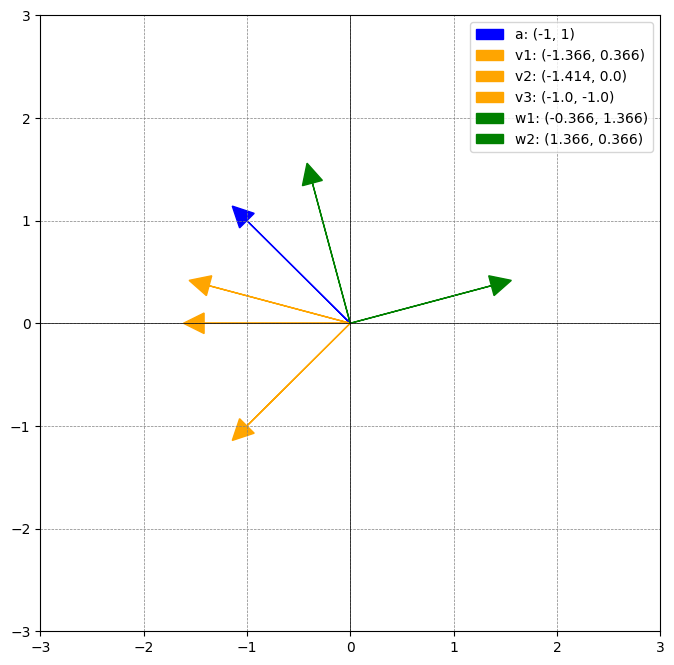

In [103]:
def rotate_vector(vector, angle, angle_type='radian', clockwise=True):
    if angle_type == 'degree':
        angle = np.radians(angle)

    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])

    if clockwise:
        rotated_vector = np.dot(rotation_matrix, vector)
    else:
        rotated_vector = np.dot(np.linalg.inv(rotation_matrix), vector)

    return rotated_vector

def plot_vector(ax, vector, name, color):
    ax.arrow(0, 0, vector[0], vector[1], head_width=0.2, head_length=0.2,
             fc=color, ec=color, label=f"{name}: ({round(vector[0], 3)}, {round(vector[1], 3)})")

# Вектор a
a = np.array([-1, 1])

# Углы поворота в градусах и радианах
angles_degrees = [30, 45, 90]
angles_radians = [np.pi/6, 2*np.pi/3]

# Создаем словарь с именами векторов и углами поворота в радианах
vectors_dict = {'v1': angles_degrees[0], 'v2': angles_degrees[1], 'v3': angles_degrees[2],
                'w1': angles_radians[0], 'w2': angles_radians[1]}

# Создаем график
fig, ax = plt.subplots(figsize=(8, 8))

# Изображаем вектор a
plot_vector(ax, a, 'a', 'blue')

# Изображаем повернутые векторы
for name, angle in vectors_dict.items():
    rotated_vector = rotate_vector(a, angle, angle_type='degree' if name[0] == 'v' else 'radian', clockwise=name[0] == 'v')
    plot_vector(ax, rotated_vector, name, 'orange' if name[0] == 'v' else 'green')

# Настраиваем отображение
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Добавляем легенду
ax.legend()

# Отображаем график
plt.show()


# Задание 6*
Считать из файла "task_13_6.xlsx" координаты векторов на плоскости и углы поворота (крайний левый столбец в файле содержит имена векторов, следующие два - координаты векторов, затем угол поворота и последний столбец содержит текст "rad" или "deg", т.е. угол в радианах или градусах).

Для каждого вектора найти координаты вектора, полученного в результате поворота, затем записать в файл  "task_13_6_ans.xlsx" имена векторов  из файла "task_13_6.xlsx" и координаты  векторов, полученных в результате поворота. В файле  "task_13_6_ans.xlsx" подписи строк - имена векторов, подписи столбцов - имена координат, т.е. "x" и "y".

Изобразить на графике вектор [1, 2] из Задания 1 и результаты его поворота (по Заданию 1). В легенде графика для каждого вектора, кроме [1, 2] указать матрицу поворота, а для [1, 2] единичную матрицу.

In [145]:
def rotation_matrix(angle, angle_type='radian'):
    """
    Функция для создания матрицы линейного оператора поворота.

    Параметры:
    - angle: угол поворота
    - angle_type: тип меры угла ('degree' или 'radian')
    - clockwise: направление поворота (по или против часовой стрелки)

    Возвращает матрицу линейного оператора поворота.
    """
    if angle_type == 'degree':
        angle = Rad(angle)  # Преобразование градусов в радианы

    rotation_matrix = Matrix([
        [Cos(angle), -Sin(angle)],
        [Sin(angle), Cos(angle)]
    ])

    return rotation_matrix


# Чтение данных из файла
df = pd.read_excel("task_13_6.xlsx", header=None)  # Указываем header=None, чтобы не использовать первую строку как заголовок

# Получение угла поворота и типа угла
angles = df.iloc[:, 3].tolist()  # Используем второй столбец для углов поворота
angle_types = df.iloc[:, 4].tolist()  # Используем третий столбец для типов углов

# Получение координат векторов
vectors_pd = df.iloc[:, 1:3].values[1:]  # Используем 2-й и 3-й столбцы для координат векторов
vectors = []
for vector in vectors_pd:
    vectors.append(Matrix([vector[0], vector[1]]))

# Считаем результаты поворотов
results = []
for i, angle in enumerate(angles):
    angle_type = angle_types[i]
    rotation_matrix_i = rotation_matrix(angle, angle_type=angle_type)
    rotated_vector_i = np.dot(rotation_matrix_i, vectors[i-1])
    results.append(rotated_vector_i)

# Создаем новый DataFrame с результатами
# results_df = pd.DataFrame(results, columns=["x", "y"])

# Добавляем имена векторов
# results_df["vector_name"] = df.iloc[:, 0]  # Используем первый столбец для имен векторов

# Сохраняем результат в новый файл
# results_df.to_excel("task_13_6_ans.xlsx", index=False)


###  Индивидуальное задание
Найти собственные числа и собственные векторы линейного оператора. Построить матрицу оператора в заданном базисе. Построить матрицу оператора в базисе из собственных векторов.

Вывести на экран матрицу оператора А, матрицу перехода к базису ($e_1$, $e_2$, $e_3$), матрицу оператора в базисе ($e_1$, $e_2$, $e_3$), матрицу перехода к базису из собственных векторов, матрицу оператора в базисе из собственных векторов.

Даны матрица оператора A, векторы базиса $e_1$, $e_2$, $e_3$.

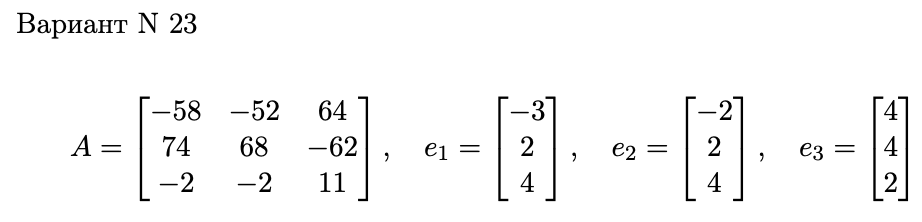

In [149]:
# Даны матрица оператора A и базисные векторы
A = Matrix([[-58, -52, 64],
            [74, 68, -62],
            [-2, -2, 11]])
e1 = Matrix([-3, 2, 4])
e2 = Matrix([-2, 2, 4])
e3 = Matrix([4, 4, 2])

# Находим собственные числа
eigenvalues = A.eigenvals()
display(Latex(f'\\text{{Собственные числа: }}{latex(eigenvalues)}'))

# Находим собственные векторы
eigenvectors = A.eigenvects()
print("\n")
for eigenvalue, multiplicity, vectors in eigenvectors:
    display(Latex(f'\\text{{Собственное число: }}{latex(eigenvalue)}'))
    for vector in vectors:
        display(Latex(f'\\text{{Собственный вектор:}}{latex(vector.T)}'))

# Построим матрицу перехода к базису (e1, e2, e3)
P_basis = Matrix.hstack(e1, e2, e3)

# Построим матрицу оператора в базисе (e1, e2, e3)
A_basis = P_basis.inv() * A * P_basis

# Вывод результатов
print('\n')
display(Latex(f'\\text{{Матрица оператора A:}}{latex(A)}'))

print('\n')
display(Latex(f'\\text{{Матрица перехода к базису (e1, e2, e3):}}{latex(P_basis)}'))

print('\n')
display(Latex(f'\\text{{Матрица оператора в базисе (e1, e2, e3):}}{latex(A_basis)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>